In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(396)
#random_state = 1
#pitching = pd.read_csv('/content/drive/MyDrive/Pitching.csv')
pitching = pd.read_csv("Pitching.csv")
all_star = pd.read_csv("AllstarFull.csv")

In [ ]:
#EDA
#Clean NA values
pitching = pitching.fillna(0)
#Filter out shortened seasons
pitching = pitching.query('yearID != 2020 & yearID != 1994 & yearID != 1981')
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000,46763.000000
mean,1971.109852,1.082287,4.626157,4.626157,23.735004,9.304878,3.016851,0.428523,1.494793,249.026324,83.177277,35.528003,6.472553,29.343883,46.671043,0.284083,5.110120,1.583175,2.610846,2.357227,0.293908,355.268011,6.284434,42.244723,1.606377,1.289973,3.329192
std,38.502300,0.290172,5.762779,4.954932,18.657882,12.235033,6.970385,1.088861,5.014247,255.195991,83.899293,33.217106,7.043137,27.949973,49.651079,0.601563,5.490715,2.499319,3.698423,3.159401,0.742851,357.332061,9.939163,42.882213,2.843168,2.111808,5.607320
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1943.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,48.000000,18.000000,9.000000,1.000000,7.000000,8.000000,0.227000,3.150000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,10.000000,0.000000,0.000000,0.000000
50%,1982.000000,1.000000,2.000000,3.000000,21.000000,2.000000,0.000000,0.000000,0.000000,162.000000,53.000000,24.000000,4.000000,21.000000,31.000000,0.260000,4.150000,0.000000,2.000000,1.000000,0.000000,235.000000,3.000000,27.000000,0.000000,0.000000,0.000000
75%,2004.000000,1.000000,7.000000,7.000000,35.000000,17.000000,2.000000,0.000000,1.000000,384.000000,130.000000,57.000000,9.000000,44.000000,68.000000,0.293000,5.540000,2.000000,4.000000,3.000000,0.000000,550.000000,8.000000,66.000000,2.000000,2.000000,5.000000
max,2019.000000,5.000000,60.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,772.000000,291.000000,50.000000,289.000000,513.000000,9.990000,189.000000,23.000000,83.000000,54.000000,16.000000,2906.000000,84.000000,519.000000,27.000000,17.000000,47.000000


Text(0.5, 0, 'Strikeouts')

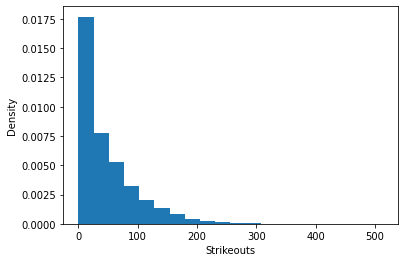

In [ ]:
#Analyze Strikeouts
import matplotlib.pyplot as plt

plt.hist(pitching['SO'], density = True, bins = 20)
plt.ylabel('Density')
plt.xlabel('Strikeouts')

Text(0.5, 0, 'Strikeouts')

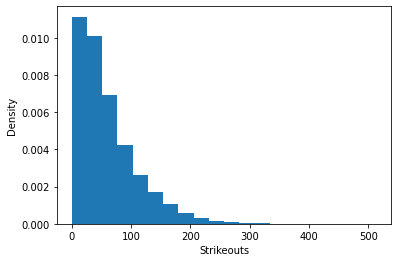

In [ ]:
#Important to note many players will only play a few times a season, so a filter for only players with many a significant amount of appearances makes sense.
#Filter out bottom 25th percentile of games

more_games = pitching.query('G >= 7')
plt.hist(more_games['SO'], density = True, bins = 20)
plt.ylabel('Density')
plt.xlabel('Strikeouts')

#Much less skewed

Text(0, 0.5, 'Strikeouts')

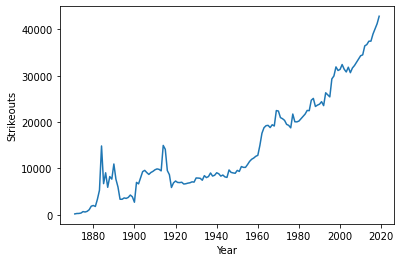

In [ ]:
#Total strikeouts per season over time
strikeouts = pitching.groupby("yearID").agg({"SO": "sum"})
plt.plot(strikeouts['SO'])
plt.xlabel('Year')
plt.ylabel('Strikeouts')

Text(0, 0.5, 'Strikeouts')

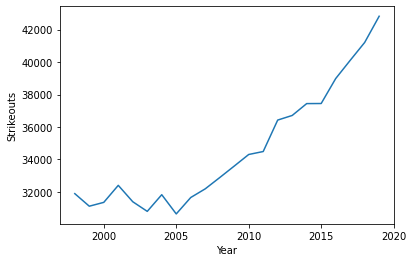

In [ ]:
#Analyze years with current amount of teams
modern_era = strikeouts.query('yearID >= 1998')
plt.plot(modern_era['SO'])
plt.xlabel('Year')
plt.ylabel('Strikeouts')
#Sharp Increase in recent years

In [ ]:
#Most Strikeouts in a Season
more_games = more_games.sort_values('SO', ascending=False)
more_games.head(n = 10)

#Strikeouts tend to appear really early in baseball history but that's probably due to a higher amount of games played.
#A better stat to use then would probably be K/9 for individual performance

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
878,kilroma01,1886,1,BL2,AA,29,34,68,68,66,5,0,1749,476,218,10,182,513,0.000,3.37,0.0,61,19.0,1,2469.0,0,350,0.0,0.0,0.0
913,ramseto01,1886,1,LS2,AA,38,27,67,67,66,3,0,1766,447,160,3,207,499,0.000,2.45,0.0,35,12.0,0,2477.0,0,297,0.0,0.0,0.0
528,dailyhu01,1884,1,CHU,UA,27,27,56,56,54,5,0,1454,430,131,11,71,469,0.000,2.43,0.0,47,0.0,0,2009.0,0,257,0.0,0.0,0.0
650,radboch01,1884,1,PRO,NL,60,12,75,73,73,11,1,2036,528,104,18,98,441,0.000,1.38,0.0,34,0.0,0,2672.0,2,216,0.0,0.0,0.0
497,buffich01,1884,1,BSN,NL,48,16,67,67,63,8,0,1761,506,140,15,76,417,0.000,2.15,0.0,24,0.0,0,2383.0,0,225,0.0,0.0,0.0
569,heckegu01,1884,1,LS2,AA,52,20,75,73,72,6,0,2012,526,134,4,56,385,0.000,1.80,0.0,27,16.0,2,2649.0,2,230,0.0,0.0,0.0
20597,ryanno01,1973,1,CAL,AL,21,16,41,39,26,4,1,978,238,104,18,162,383,0.203,2.87,2.0,15,7.0,0,1355.0,2,113,7.0,7.0,24.0
17611,koufasa01,1965,1,LAN,NL,26,8,43,41,27,8,2,1007,216,76,26,71,382,0.170,2.04,4.0,11,5.0,0,1297.0,2,90,0.0,0.0,0.0
672,sweenbi01,1884,1,BLU,UA,40,21,62,60,58,4,0,1614,522,155,13,74,374,0.000,2.59,0.0,43,0.0,0,2270.0,2,294,0.0,0.0,0.0
33841,johnsra05,2001,1,ARI,NL,21,6,35,34,3,2,0,749,181,69,19,71,372,0.203,2.49,2.0,8,18.0,1,994.0,1,74,10.0,5.0,17.0


Text(0, 0.5, 'Strikeouts per 9 Innings (K/9)')

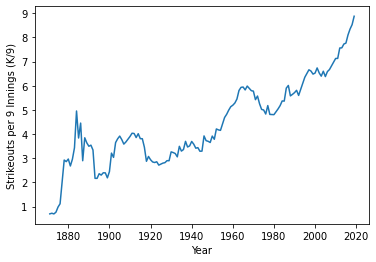

In [ ]:
#Add K/9 and IP and other metrics
pitching = pitching.assign(IP = pitching['IPouts'] / 3)
pitching = pitching.assign(WHIP = (pitching['BB'] + pitching['H']) / pitching['IP'])
pitching = pitching.assign(FIP = (13 * pitching['HR'] + 3 * pitching['BB'] - 2 * pitching['SO']) / pitching['IP'])
pitching = pitching.assign(SOBB = pitching['SO'] / pitching['BB'])
pitching = pitching.assign(SO9 = 9 * (pitching['SO'] / pitching['IP']))
pitching = pitching.assign(BB9 = 9 * (pitching['BB'] / pitching['IP']))
pitching = pitching.assign(HR9 = 9 * (pitching['HR'] / pitching['IP']))
pitching = pitching.assign(H9 = 9 * (pitching['H'] / pitching['IP']))
k9 = pitching.groupby('yearID').agg({'SO': 'sum', 'IP': 'sum'})
k9 = k9.assign(SO9 = 9 * (k9['SO'] / k9['IP']))
plt.plot(k9['SO9'])
plt.xlabel('Year')
plt.ylabel('Strikeouts per 9 Innings (K/9)')

#Clearly strikeouts are being more emphasized

In [ ]:
top_strikeouts = pitching.sort_values('SO9', ascending = False)
top_strikeouts = top_strikeouts.query('IP >= 50')
top_strikeouts.head(n = 10)
#All in recent years, and relievers

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,IP,WHIP,FIP,SOBB,SO9,BB9,HR9,H9
42698,chapmar01,2014,1,CIN,NL,0,3,54,0,0,0,36,162,21,12,1,24,106,0.121,2.00,0.0,4,2.0,0,202.0,44,12,1.0,1.0,2.0,54.000000,0.833333,-2.351852,4.416667,17.666667,4.000000,0.166667,3.500000
41483,kimbrcr01,2012,1,ATL,NL,3,1,63,0,0,0,42,188,27,7,3,14,116,0.126,1.01,0.0,5,2.0,0,231.0,56,7,0.0,0.0,3.0,62.666667,0.654255,-2.409574,8.285714,16.659574,2.010638,0.430851,3.877660
45361,kimbrcr01,2017,1,BOS,AL,5,0,67,0,0,0,35,207,33,11,6,14,126,0.140,1.43,0.0,5,4.0,0,254.0,51,11,1.0,0.0,1.0,69.000000,0.681159,-1.913043,9.000000,16.434783,1.826087,0.782609,4.304348
47045,haderjo01,2019,1,MIL,NL,3,5,61,0,0,0,37,227,41,22,15,20,138,0.155,2.62,2.0,0,4.0,0,289.0,46,24,0.0,0.0,2.0,75.666667,0.806167,-0.277533,6.900000,16.414097,2.378855,1.784141,4.876652
45941,chapmar01,2018,1,NYA,AL,3,0,55,0,0,0,32,154,24,14,2,30,93,0.136,2.45,0.0,9,5.0,0,212.0,43,15,0.0,0.0,0.0,51.333333,1.051948,-1.363636,3.100000,16.305195,5.259740,0.350649,4.207792
40736,janseke01,2011,1,LAN,NL,2,1,51,0,0,0,5,161,30,17,3,26,96,0.159,2.85,0.0,0,2.0,2,218.0,13,17,0.0,1.0,0.0,53.666667,1.043478,-1.397516,3.692308,16.099379,4.360248,0.503106,5.031056
40108,marmoca01,2010,1,CHN,NL,2,3,77,0,0,0,38,233,40,22,1,52,138,0.147,2.55,4.0,2,8.0,2,332.0,70,23,0.0,0.0,1.0,77.666667,1.184549,-1.377682,2.653846,15.991416,6.025751,0.115880,4.635193
41975,chapmar01,2013,1,CIN,NL,4,5,68,0,0,0,38,191,37,18,7,29,112,0.164,2.54,0.0,6,3.0,0,258.0,55,18,1.0,0.0,2.0,63.666667,1.036649,-0.722513,3.862069,15.832461,4.099476,0.989529,5.230366
46145,haderjo01,2018,1,MIL,NL,6,1,55,0,0,0,12,244,36,22,9,30,143,0.132,2.43,0.0,0,1.0,1,306.0,14,23,1.0,2.0,1.0,81.333333,0.811475,-0.971311,4.766667,15.823770,3.319672,0.995902,3.983607
43458,chapmar01,2015,1,CIN,NL,4,4,65,0,0,0,33,199,43,12,3,33,116,0.181,1.63,1.0,7,5.0,0,278.0,54,13,0.0,2.0,0.0,66.333333,1.145729,-1.417085,3.515152,15.738693,4.477387,0.407035,5.834171


Text(0, 0.5, 'Average Wins')

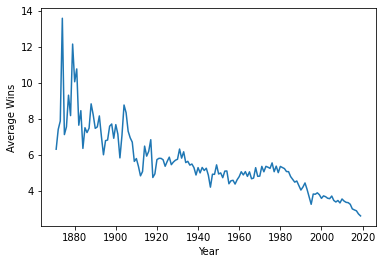

In [ ]:
#Analyze Wins
#Sum of wins shouldn't change because a pitcher is awarded a win each game, but wins on an individual level can change.
wins = pitching.groupby("yearID").agg({"W": "mean"})
plt.plot(wins['W'])
plt.xlabel('Year')
plt.ylabel('Average Wins')

Text(0, 0.5, 'Density')

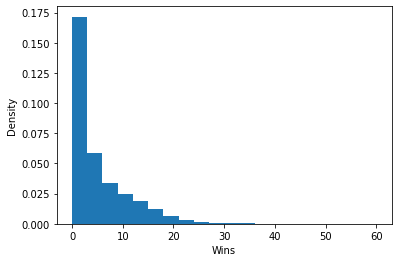

In [ ]:
plt.hist(pitching['W'], density = True, bins = 20)
plt.xlabel('Wins')
plt.ylabel('Density')

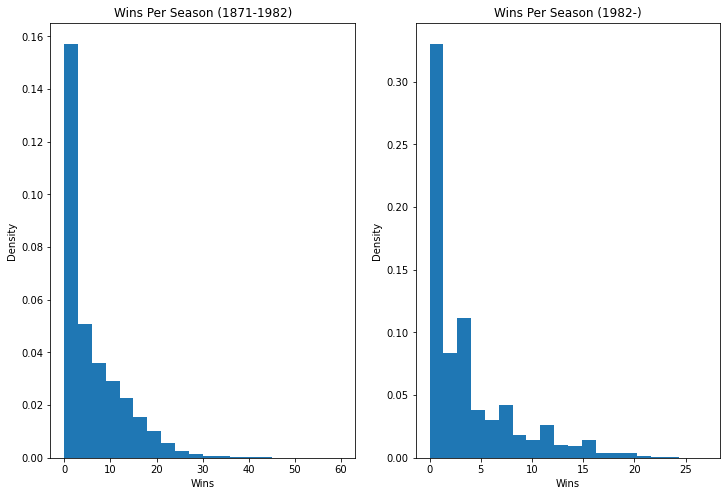

In [ ]:
#Let's seperate between modern and classic era baseball, significant dip occured after around 1980
from matplotlib.pyplot import figure

classic_era = pitching.query('yearID <= 1982')
modern_era = pitching.query('yearID >= 1983')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(121)
ax.set_xlabel('Wins')
ax.set_ylabel('Density')
ax.set_title('Wins Per Season (1871-1982)')
ax2 = fig.add_subplot(122)
ax2.set_title('Wins Per Season (1982-)')
ax2.set_xlabel('Wins')
ax2.set_ylabel('Density')
ax.hist(classic_era['W'], density = True, bins = 20)
ax2.hist(modern_era['W'], density = True, bins = 20)
plt.show()

In [ ]:
#Most Wins in a Season
wins = pitching.sort_values('W', ascending = False)
wins.head(n = 10)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,IP,WHIP,FIP,SOBB,SO9,BB9,HR9,H9
650,radboch01,1884,1,PRO,NL,60,12,75,73,73,11,1,2036,528,104,18,98,441,0.0,1.38,0.0,34,0.0,0,2672.0,2,216,0.0,0.0,0.0,678.666667,0.922397,-0.521611,4.500000,5.848232,1.299607,0.238703,7.001965
124,spaldal01,1875,1,BS1,0,54,5,72,62,52,7,9,1712,573,101,1,18,75,0.0,1.59,0.0,17,0.0,1,2354.0,12,241,0.0,0.0,0.0,570.666667,1.035631,-0.145444,4.166667,1.182827,0.283879,0.015771,9.036799
712,clarkjo01,1885,1,CHN,NL,53,16,70,70,68,10,0,1869,497,128,21,97,308,0.0,1.85,0.0,14,0.0,0,2487.0,0,255,0.0,0.0,0.0,623.000000,0.953451,-0.083467,3.175258,4.449438,1.401284,0.303371,7.179775
81,spaldal01,1874,1,BS1,0,52,16,71,69,65,4,0,1852,755,132,1,19,31,0.0,1.92,0.0,18,0.0,0,2784.0,2,402,0.0,0.0,0.0,617.333333,1.253780,0.012959,1.631579,0.451944,0.276998,0.014579,11.007019
569,heckegu01,1884,1,LS2,AA,52,20,75,73,72,6,0,2012,526,134,4,56,385,0.0,1.80,0.0,27,16.0,2,2649.0,2,230,0.0,0.0,0.0,670.666667,0.867793,-0.820080,6.875000,5.166501,0.751491,0.053678,7.058648
1232,clarkjo01,1889,1,BSN,NL,49,19,73,72,68,8,1,1860,589,188,16,203,284,0.0,2.73,0.0,16,17.0,0,2641.0,1,280,0.0,0.0,0.0,620.000000,1.277419,0.401613,1.399015,4.122581,2.946774,0.232258,8.550000
440,radboch01,1883,1,PRO,NL,48,25,76,68,66,4,1,1897,563,144,7,56,315,0.0,2.05,0.0,36,0.0,0,2540.0,8,275,0.0,0.0,0.0,632.333333,0.978914,-0.586716,5.625000,4.483395,0.797048,0.099631,8.013179
497,buffich01,1884,1,BSN,NL,48,16,67,67,63,8,0,1761,506,140,15,76,417,0.0,2.15,0.0,24,0.0,0,2383.0,0,225,0.0,0.0,0.0,587.000000,0.991482,-0.700170,5.486842,6.393526,1.165247,0.229983,7.758092
230,wardjo01,1879,1,PRO,NL,47,19,70,60,58,2,1,1761,571,140,5,36,239,0.0,2.15,0.0,29,0.0,0,2425.0,10,270,0.0,0.0,0.0,587.000000,1.034072,-0.519591,6.638889,3.664395,0.551959,0.076661,8.754685
161,spaldal01,1876,1,CHN,NL,47,12,61,60,53,8,0,1586,542,103,6,26,39,0.0,1.75,0.0,1,0.0,0,2219.0,2,226,0.0,0.0,0.0,528.666667,1.074401,0.147541,1.500000,0.663934,0.442623,0.102144,9.226986


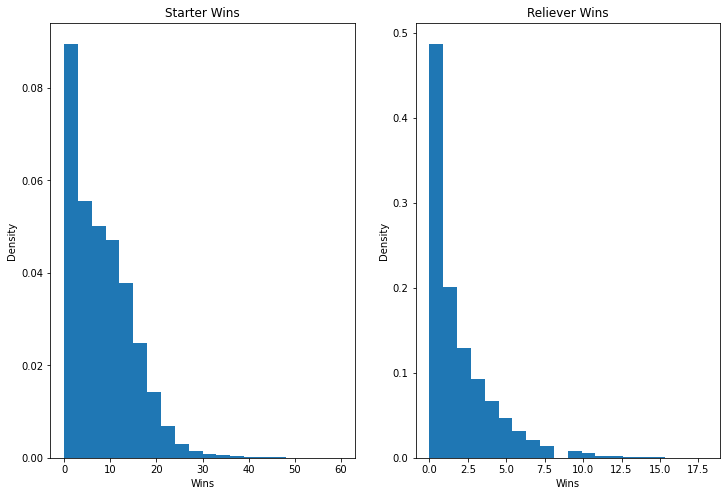

In [ ]:
#Differentiate Relievers and Starters
pitching['POS'] = np.where((pitching['GS'] / pitching['G'] >= .45) | (pitching['GS'] >= 10), 'SP', 'RP')
starters = pitching.query('`POS` == "SP"')
relievers = pitching.query('`POS` == "RP"')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(121)
ax.set_xlabel('Wins')
ax.set_ylabel('Density')
ax.set_title('Starter Wins')
ax2 = fig.add_subplot(122)
ax2.set_title('Reliever Wins')
ax2.set_xlabel('Wins')
ax2.set_ylabel('Density')
ax.hist(starters['W'], density = True, bins = 20)
ax2.hist(relievers['W'], density = True, bins = 20)
plt.show()
#Relievers have a unique measure in Saves, Wins really relate better to Starters

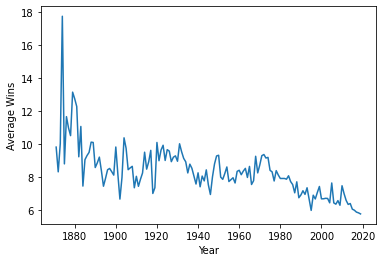

In [ ]:
wins = starters.groupby("yearID").agg({"W": "mean"})
plt.plot(wins['W'])
plt.xlabel('Year')
plt.ylabel('Average Wins')
plt.show()
#So decreasing yes, but not as drastic, more relievers in the game muddies the numbers.

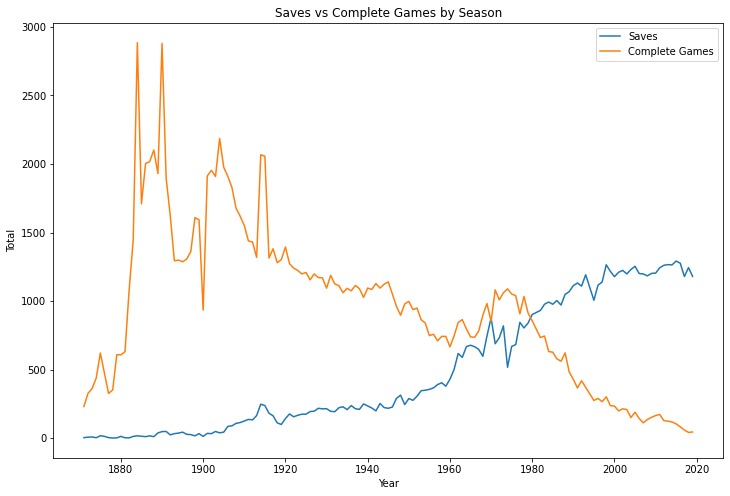

In [ ]:
#Reflecting the prominence of the relivers, the recent emphasis on closers and the disappearance of Complete Games
totals = pitching.groupby("yearID").agg({"SV": "sum", "CG": "sum"})
plt.figure(figsize=(12,8))
plt.plot(totals['SV'], label = "Saves")
plt.plot(totals['CG'], label = "Complete Games")
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Saves vs Complete Games by Season')
plt.legend()
plt.show()

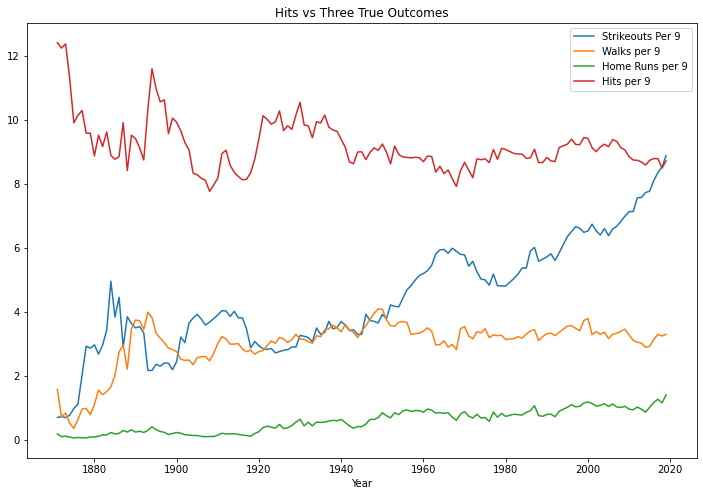

In [ ]:
#We know now, pitchers pitch less (IP) and throw for more strikeouts, one of the three true outcomes: (BB, SO, HR), and less for contact (equals less hits)
#To go along with SO9, makes sense to add the other alike metrics, walks per 9, home runs per 9 and hits per 9, I'll add above

total_metrics = pitching.groupby("yearID").agg({"IP": "sum", "SO": "sum", "BB": "sum", "HR": "sum", "H": "sum", "IPouts": "mean", "G": "sum"})
total_metrics = total_metrics.assign(SO9 = 9 * (total_metrics['SO'] / total_metrics['IP']))
total_metrics = total_metrics.assign(BB9 = 9 * (total_metrics['BB'] / total_metrics['IP']))
total_metrics = total_metrics.assign(HR9 = 9 * (total_metrics['HR'] / total_metrics['IP']))
total_metrics = total_metrics.assign(H9 = 9 * (total_metrics['H'] / total_metrics['IP']))
total_metrics = total_metrics.assign(IPmean = total_metrics['IPouts'] / 3)
total_metrics = total_metrics.assign(IP_G = total_metrics['IP'] / total_metrics['G'])
plt.figure(figsize=(12,8))
plt.plot(total_metrics["SO9"], label = "Strikeouts Per 9")
plt.plot(total_metrics["BB9"], label = "Walks per 9")
plt.plot(total_metrics["HR9"], label = "Home Runs per 9")
plt.plot(total_metrics["H9"], label = "Hits per 9")
plt.xlabel('Year')
plt.title('Hits vs Three True Outcomes')
plt.legend()
plt.show()

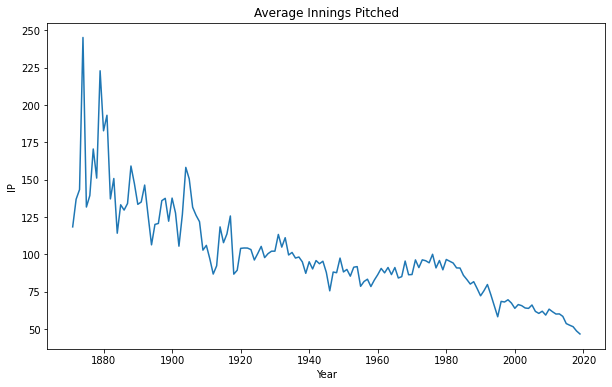

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(total_metrics["IPmean"])
plt.xlabel('Year')
plt.ylabel('IP')
plt.title('Average Innings Pitched')
plt.show()

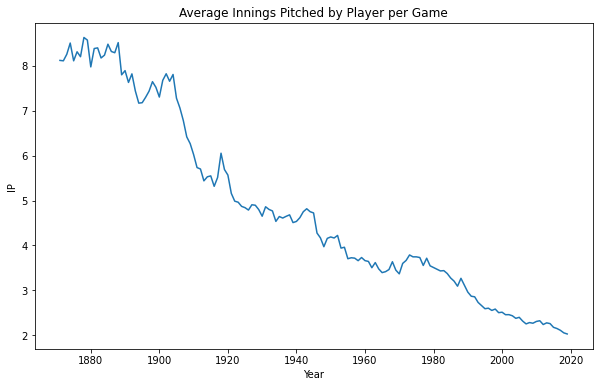

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(total_metrics["IP_G"])
plt.xlabel('Year')
plt.ylabel('IP')
plt.title('Average Innings Pitched by Player per Game')
plt.show()

In [ ]:
#ML Predict All_Star given yearly statistics
#Takes ~6 min to run
all_star = all_star[['playerID', 'yearID']]
all_star_pitchers = pitching.query("yearID >= 1933")
all_star_pitchers = all_star_pitchers.reset_index()
all_star_pitchers = all_star_pitchers.assign(AllStar = "No")
for i in range(0, len(all_star_pitchers)):
    player_year = [all_star_pitchers.iloc[i]['playerID'], all_star_pitchers.iloc[i]['yearID']]
    if (all_star == player_year).all(1).any():
      all_star_pitchers.loc[i, 'AllStar'] = 'Yes'
all_star_pitchers = all_star_pitchers.drop("index", axis = 1)

In [ ]:
#Very Skewed Data, most players are not all stars
all_star_pitchers['AllStar'].value_counts()

No     35709
Yes     1721
Name: AllStar, dtype: int64

In [ ]:
#PreProcessing
target = all_star_pitchers['AllStar']
from sklearn import preprocessing
#Features to Select - Wins, SV, SO, ERA, WHIP, SO9, FIP, SOBB, BB9, POS
features = all_star_pitchers[["W", "SV", "SO", "ERA", "WHIP", "SO9", "FIP", "SOBB", "BB9", "POS"]]

In [ ]:
#Dummy Code POS
features = features.fillna(0)
pd.options.mode.use_inf_as_na = True
features = features.fillna(9999999)
enc = preprocessing.OrdinalEncoder()
data = enc.fit_transform(features)
#Scale Features
scaled_features = preprocessing.scale(data)

In [ ]:
#Set Up Train/Test Split then Grid Search, important to Stratify for the target because it's sparse.
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(scaled_features, target, test_size = .2, stratify = target)

In [ ]:
#Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {"penalty": ['none', 'l2', 'l1', 'elasticnet'], "l1_ratio": [.5, .25, .75]}
gs_model = GridSearchCV(LogisticRegression(solver = "saga"), parameters, scoring = "accuracy")
gs_model.fit(data_train, target_train)

In [ ]:
gs_model.best_params_

{'l1_ratio': 0.25, 'penalty': 'none'}

In [ ]:
gs_model.best_score_

0.9617620000952538

In [ ]:
#Performance on Test Data
gs_model.score(data_test, target_test)

0.9632647608869891

In [ ]:
#Model Did Well, what features are important in All-Star Selection?
#Positive Scores Indicate Predicting class 1 (Yes All - Star), Negative Scores indicate predicting class 0 (No All-Star)
model = LogisticRegression(penalty="l1", solver = "saga")
model.fit(data_train, target_train)
importance = model.coef_[0]
names = ["W", "SV", "SO", "ERA", "WHIP", "SO9", "FIP", "SOBB", "BB9", "POS"]
for i in range(0, len(importance)):
	print('Feature: %s, Score: %.5f' % (names[i],importance[i]))

 #Interesting that Wins still play a big role, probably because pitchers who pitch well, and frequently naturally get wins, or saves, where as someone who pitches once gets no wins is an obvious non all-star.

Feature: W, Score: 1.03864
Feature: SV, Score: 0.66633
Feature: SO, Score: 0.38753
Feature: ERA, Score: -1.13521
Feature: WHIP, Score: -0.39786
Feature: SO9, Score: 0.38598
Feature: FIP, Score: -0.13431
Feature: SOBB, Score: -0.48358
Feature: BB9, Score: -0.28279
Feature: POS, Score: 0.53270


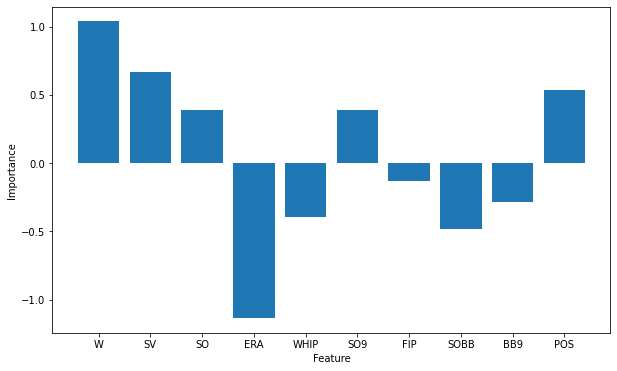

In [ ]:
x = np.arange(len(importance))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, height = importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Model 2 - Random Forest
from sklearn.ensemble import RandomForestClassifier

parameters = {"n_estimators": [100, 10, 50, 150], "min_samples_split": [2, 4, 6]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, scoring = "accuracy")
gs_model.fit(data_train, target_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 10, 50, 150]},
             scoring='accuracy')

In [ ]:
gs_model.best_params_

{'min_samples_split': 6, 'n_estimators': 150}

In [ ]:
gs_model.best_score_

0.9625969253584813

In [ ]:
gs_model.score(data_test, target_test)

0.9635319262623564

In [ ]:
#Variable Importance - Random Forest
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 4)
model.fit(data_train, target_train)
importance = model.feature_importances_

In [ ]:
for i in range(0, len(importance)):
	print('Feature: %s, Score: %.5f' % (names[i],importance[i]))

 #These results are very interesting, again importance on Wins, high importance on Strikeouts. Saves, ERA and Whip all quite important and the metric features just a step down. Position plays no affect which is intuitive.
 #Future improvement could involve switching up features, include IP? maybe Games Appeared (G)? Losses?

Feature: W, Score: 0.18886
Feature: SV, Score: 0.10340
Feature: SO, Score: 0.15718
Feature: ERA, Score: 0.10667
Feature: WHIP, Score: 0.10459
Feature: SO9, Score: 0.08521
Feature: FIP, Score: 0.09126
Feature: SOBB, Score: 0.08030
Feature: BB9, Score: 0.07646
Feature: POS, Score: 0.00608


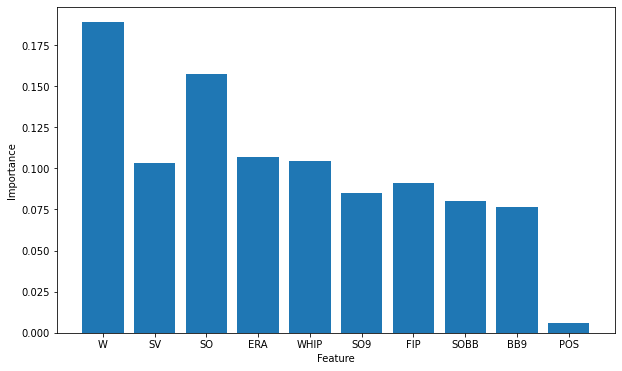

In [ ]:
x = np.arange(len(importance))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, height = importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Model 3 - Boosted Tree
from sklearn.ensemble import GradientBoostingClassifier

parameters = {"n_estimators": [100, 50, 150, 175], "learning_rate": [.01, .1, .4], "max_depth": [3, 5], "min_samples_split": [2, 4, 6]}
gs_model = GridSearchCV(GradientBoostingClassifier(), parameters, scoring = "accuracy")
gs_model.fit(data_train, target_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.4], 'max_depth': [3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 50, 150, 175]},
             scoring='accuracy')

In [ ]:
gs_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 6,
 'n_estimators': 50}

In [ ]:
gs_model.best_score_

0.9621960791399685

In [ ]:
gs_model.score(data_test, target_test)
#Best Perfoming Model So far

0.9629975955116217

In [ ]:
#Variable Importance - Boosted Tree
model = GradientBoostingClassifier(n_estimators = 175, min_samples_split = 2, max_depth = 3, learning_rate = .01)
model.fit(data_train, target_train)
importance = model.feature_importances_
for i in range(0, len(importance)):
	print('Feature: %s, Score: %.5f' % (names[i],importance[i]))

Feature: W, Score: 0.56143
Feature: SV, Score: 0.20027
Feature: SO, Score: 0.06767
Feature: ERA, Score: 0.11877
Feature: WHIP, Score: 0.01085
Feature: SO9, Score: 0.01245
Feature: FIP, Score: 0.01843
Feature: SOBB, Score: 0.00926
Feature: BB9, Score: 0.00088
Feature: POS, Score: 0.00000


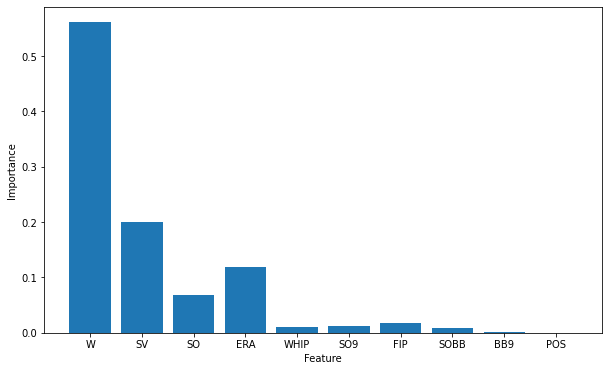

In [ ]:
x = np.arange(len(importance))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, height = importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.show()
#This is quite different then the other variable importance graphs, as in Wins by far is the most important variable here followed by saves. Strikeouts and ERA play a role but the other metrics are marginal at best.
#The model tends to prefer cumulative stats as opposed to metric stats, this could help inform better feature selection for the future.

In [ ]:
#Future Improvement - change feature selection, include more models, K-Cross Validation, PCA?
#Analyze specific accuracy of True Positives - change metric to sensitivity (recall)?

In [ ]:
#Model 1 - Logistic Regression (with Recall)
#Binary Classify target
binary_target = []
for i in range(0, len(target)):
  if target[i] == "No":
    binary_target.append(0)
  else:
    binary_target.append(1)
data_train, data_test, target_train, target_test = train_test_split(scaled_features, binary_target, test_size = .2, stratify = target)

In [ ]:
parameters = {"penalty": ['none', 'l2', 'l1', 'elasticnet'], "l1_ratio": [.5, .25, .75]}
gs_model = GridSearchCV(LogisticRegression(solver = "saga"), parameters, scoring = "recall")
gs_model.fit(data_train, target_train)

In [ ]:
gs_model.best_params_

{'l1_ratio': 0.5, 'penalty': 'none'}

In [ ]:
gs_model.best_score_

0.3674176548089592

In [ ]:
#Performance on Test Data
gs_model.score(data_test, target_test)

#Much different outlook when using Recall, definitely improvements to explore and be made (use balanced accuracy going forward?).
#Balanced Accuracy is the average of True Positive Rate and True Negative Rate

0.31976744186046513

In [ ]:
model = LogisticRegression(penalty="none", solver = "saga")
model.fit(data_train, target_train)
importance = model.coef_[0]
for i in range(0, len(importance)):
	print('Feature: %s, Score: %.5f' % (names[i],importance[i]))

Feature: W, Score: 1.05926
Feature: SV, Score: 0.67787
Feature: SO, Score: 0.45428
Feature: ERA, Score: -1.09928
Feature: WHIP, Score: -0.42588
Feature: SO9, Score: 0.29033
Feature: FIP, Score: -0.13919
Feature: SOBB, Score: -0.46023
Feature: BB9, Score: -0.19372
Feature: POS, Score: 0.46550


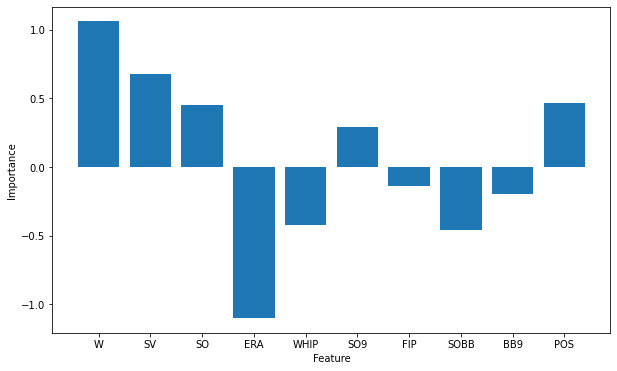

In [ ]:
x = np.arange(len(importance))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, height = importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#11/29
##Add Improvements
#Edit Feature Selection
#(Note that I tried PCA and it showed no improvement over regular method)
features2 = all_star_pitchers[['W', 'SV', 'ERA', 'SO', 'GS', 'IP', 'WHIP']]
pd.options.mode.use_inf_as_na = False
features2 = features2.fillna(0)
pd.options.mode.use_inf_as_na = True
features2 = features2.fillna(9999999)
#Scale Features
scaled_features = preprocessing.scale(features2)

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(scaled_features, binary_target, test_size = .2, stratify = binary_target)

In [ ]:
#Model 1 - Logistic Regression (Try 2)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {"penalty": ['none', 'l2', 'l1', 'elasticnet'], "l1_ratio": [.5, .25, .75]}
gs_model = GridSearchCV(LogisticRegression(solver = "saga"), parameters, scoring = "balanced_accuracy")
gs_model.fit(data_train, target_train)

In [ ]:
gs_model.best_params_

{'l1_ratio': 0.5, 'penalty': 'none'}

In [ ]:
gs_model.best_score_

0.6637669351262968

In [ ]:
#Performance on Test Data
gs_model.score(data_test, target_test)

0.6808125696013754

In [ ]:
model = LogisticRegression(penalty="none", solver = "saga")
model.fit(data_train, target_train)
importance = model.coef_[0]
names = ['W', 'SV', 'ERA', 'SO', 'GS', 'IP', 'WHIP']
for i in range(0, len(importance)):
	print('Feature: %s, Score: %.5f' % (names[i],importance[i]))

Feature: W, Score: 1.00324
Feature: SV, Score: 0.65201
Feature: ERA, Score: -3.61657
Feature: SO, Score: 0.50687
Feature: GS, Score: 0.31103
Feature: IP, Score: -0.03681
Feature: WHIP, Score: -0.13679


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


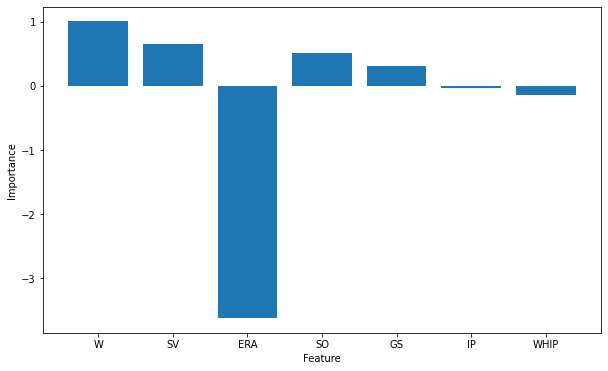

In [ ]:
x = np.arange(len(importance))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, height = importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Model 2 - Random Forest
parameters = {"n_estimators": [100, 10, 50, 150], "min_samples_split": [2, 4, 6]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, scoring = "balanced_accuracy")
gs_model.fit(data_train, target_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 10, 50, 150]},
             scoring='balanced_accuracy')

In [ ]:
gs_model.best_params_

{'min_samples_split': 6, 'n_estimators': 50}

In [ ]:
gs_model.best_score_

0.6815588218235339

In [ ]:
#Performance on Test Data
gs_model.score(data_test, target_test)

0.6817759991664116

In [ ]:
#Variable Importance - Random Forest
model = RandomForestClassifier(n_estimators = 50, min_samples_split = 6)
model.fit(data_train, target_train)
importance = model.feature_importances_

In [ ]:
for i in range(0, len(importance)):
	print('Feature: %s, Score: %.5f' % (names[i],importance[i]))

Feature: W, Score: 0.18359
Feature: SV, Score: 0.12610
Feature: ERA, Score: 0.19082
Feature: SO, Score: 0.19696
Feature: GS, Score: 0.07713
Feature: IP, Score: 0.18404
Feature: WHIP, Score: 0.04136


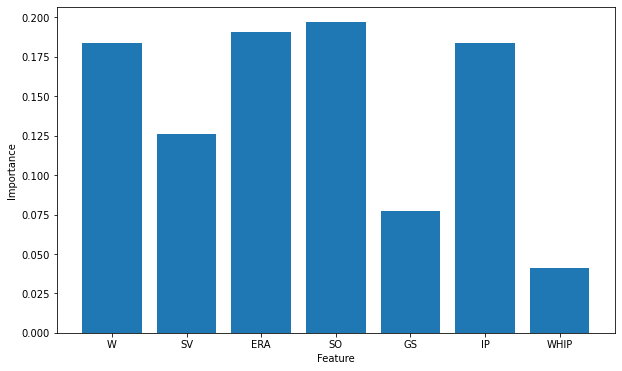

In [ ]:
x = np.arange(len(importance))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, height = importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.show()

#Note the Feature importance difference from first set of features to this one, model loves the cumulative stats, more balanced importance yet ERA still valued really highly which is accurate to
#evaluation in real life

In [ ]:
#Model 3 - Boosted Tree
from sklearn.ensemble import GradientBoostingClassifier

parameters = {"n_estimators": [100, 50, 150, 175], "learning_rate": [.01, .1, .4], "max_depth": [3, 5], "min_samples_split": [2, 4, 6]}
gs_model = GridSearchCV(GradientBoostingClassifier(), parameters, scoring = "balanced_accuracy")
gs_model.fit(data_train, target_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.4], 'max_depth': [3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 50, 150, 175]},
             scoring='balanced_accuracy')

In [ ]:
gs_model.best_params_

{'learning_rate': 0.4,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
gs_model.best_score_

0.6915587028179695

In [ ]:
gs_model.score(data_test, target_test)
#Best Performing model again

0.6886600229236811

In [ ]:
#Variable Importance - Boosted Tree
model = GradientBoostingClassifier(n_estimators = 50, min_samples_split = 2, max_depth = 5, learning_rate = .4)
model.fit(data_train, target_train)
importance = model.feature_importances_
for i in range(0, len(importance)):
	print('Feature: %s, Score: %.5f' % (names[i],importance[i]))

Feature: W, Score: 0.36988
Feature: SV, Score: 0.14189
Feature: ERA, Score: 0.16150
Feature: SO, Score: 0.13633
Feature: GS, Score: 0.03427
Feature: IP, Score: 0.13459
Feature: WHIP, Score: 0.02154


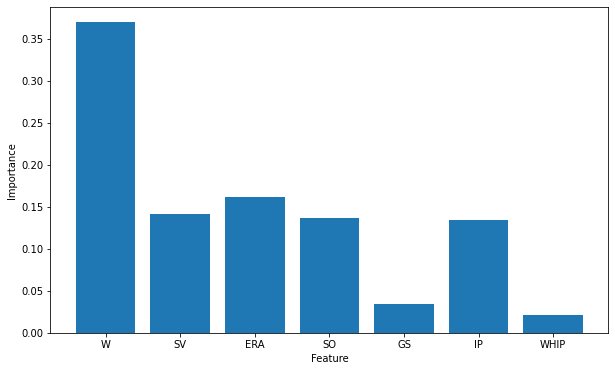

In [ ]:
x = np.arange(len(importance))
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, height = importance)
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
ax.set_xticks(x)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Model 4 - KNN
from sklearn.neighbors import KNeighborsClassifier

parameters = {"n_neighbors": [5, 3, 7, 4, 6], "weights": ["uniform", "distance"]}
gs_model = GridSearchCV(KNeighborsClassifier(), parameters, scoring = "balanced_accuracy")
gs_model.fit(data_train, target_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 3, 7, 4, 6],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

In [ ]:
gs_model.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
gs_model.best_score_

0.6846886336216685

In [ ]:
gs_model.score(data_test, target_test)
#Best performance on tests set, very competitive with Boosted Tree
#KNN does not provide Feature Importance

0.6913569744648428

In [ ]:
#Final Insights
#This is a difficult ML problem, choosing All-Stars is subjective of course, and it's a problem that changes year to year. It's difficult to evaluate everyone at once when All-Stars are
#selected in comparison to only the players of that specific season, so the margin for an All-Star varies season to season
#Nonetheless the models were able to do a decent job evaluating the features and making sensible predictions.
#It seemed to favor cumulative statistics like Wins and Strikeouts as opposed to Metric stats like WHIP and FIP but what was encouraging is that it thought that ERA is very important which we
#know is a big factor for All-Star slection each year.
#Another potential issue models probably faced is the increase in relievers in recent years. Relievers pitch less so have less Wins - Strikouts etc. but have progressively become more important
#So there is less data on them and because the stat lines are really different then starters the model more often then not probably overlooked relievers.
#The importance of SO over WHIP is also indicative of the evolution of what stats are emphasized in the modern era which was picked up by the models. The game has evolved away from the traditional
#limiting hits and walks approach to a power approach focusing on strikeouts.

In [ ]:
#Model 4 - KNN - Recall
from sklearn.neighbors import KNeighborsClassifier

parameters = {"n_neighbors": [5, 3, 7, 4, 6], "weights": ["uniform", "distance"]}
gs_model = GridSearchCV(KNeighborsClassifier(), parameters, scoring = "recall")
gs_model.fit(data_train, target_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 3, 7, 4, 6],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
gs_model.best_score_

0.3849196310935441

In [ ]:
gs_model.best_params_

Predicting year ahead stats using training data from 2016-2018 using XGBoost

In [ ]:
# Predict
import xgboost as xgb
import joblib
import shap
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, precision_score, recall_score
# limit to only pitchers in the last 3 seasons
stat_pitching = pitching.query("yearID >= 2016 & yearID <= 2019 & G >= 7")

stat_pitching = stat_pitching.sort_values(by=['playerID', 'yearID'])

stat_pitching = stat_pitching.drop(columns=['stint', 'teamID', 'lgID', 'L', 'CG', 'SHO', 'BAOpp',	'ERA',	'IBB',	'WP',	'HBP',	'BK',	'BFP',	'GF'	,'R',	'SH',	'SF',	'GIDP', 'HR'])

stat_pitching = stat_pitching.groupby(['playerID', 'yearID']).agg('sum')

stat_pitching = stat_pitching.assign(IP = stat_pitching['IPouts'] / 3)
stat_pitching = stat_pitching.assign(WHIP = (stat_pitching['BB'] + stat_pitching['H']) / stat_pitching['IP'])
stat_pitching = stat_pitching.assign(ERA = 9 * stat_pitching['ER'] / stat_pitching['IP'])

stat_pitching = stat_pitching.drop(columns=['ER', 'H', 'IPouts', 'BB', 'G'])


In [ ]:
stat_pitching = stat_pitching.reset_index()
targets = stat_pitching[stat_pitching['yearID'] == 2019]
# targets = targets.drop(['playerID', 'yearID'])

In [ ]:
# feature engineering
# target variables are the following year's statistics

stat_pitching = stat_pitching[stat_pitching['yearID'] < 2019]
xshifted = stat_pitching.groupby(by='playerID').shift(-1)
stat_pitching = stat_pitching.join(xshifted.rename(columns=lambda x: x+"_target"))

In [ ]:
stat_pitching = stat_pitching.dropna()

# # Define features and target variable
X = stat_pitching[['W', 'SV', 'ERA', 'SO', 'GS', 'IP', 'WHIP']]

In [ ]:
# target variables and names
yw = stat_pitching['W_target']
ysv = stat_pitching['SV_target']
yera = stat_pitching['ERA_target']
yso = stat_pitching['SO_target']
ygs = stat_pitching['GS_target']
yip = stat_pitching['IP_target']
ywhip = stat_pitching['WHIP_target']

# Target variables and names
ys = [stat_pitching['W_target'], stat_pitching['SV_target'], stat_pitching['ERA_target'],stat_pitching['SO_target'],stat_pitching['GS_target'],stat_pitching['IP_target'],stat_pitching['WHIP_target']]
names = ['yw', 'ysv' ,'yera','yso' ,'ygs','yip','ywhip']


In [ ]:
def tuning(xtrain, xtest, ytrain, ytest, name):
  # default params
  param_dict = {'n_estimators':500, 'learning_rate':0.01, 'max_depth':5}

  base_model = xgb.XGBRegressor(eval_metric='rmse', **param_dict, verbosity=0)

  print(base_model)

  base_model.fit(xtrain, ytrain)
  score = base_model.score(xtrain, ytrain)
  print("Base training score: ", score)


  # Cross-validataion
  scores = -cross_val_score(base_model, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')
  print("Mean cross-validation score: %.2f" % scores.mean())

  kfold = KFold(n_splits=10, shuffle=True, random_state=random_state)
  kf_cv_scores = -cross_val_score(base_model, xtrain, ytrain, cv=kfold, scoring='neg_mean_absolute_error')
  print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

  # Predict test data with base model
  base_ypred = base_model.predict(xtest)
  base_mae = mean_absolute_error(ytest, base_ypred)
  base_mse = mean_squared_error(ytest, base_ypred)
  print("Base MAE: %.2f" % base_mae)
  print("Base MSE: %.2f" % base_mse)
  print("Base RMSE: %.2f" % (base_mse**(1/2.0)))

  # Plot model performance
  x_ax = range(len(ytest))
  plt.scatter(x_ax, ytest, s=5, color="blue", label="actual")
  plt.plot(x_ax, base_ypred, lw=0.8, color="red", label="predicted")
  plt.legend()
  plt.show()

  # Display feature importance chart
  xgb.plot_importance(base_model, max_num_features = 15)
  plt.tight_layout()
  plt.show()

  # find best max depth
  model = xgb.XGBRegressor(eval_metric='rmse', **param_dict, objective ='reg:squarederror',)
  print(model)
  max_depth = range(2, 8, 1)
  param_grid = dict(max_depth=max_depth)
  kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)
  grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=kfold, verbose=1)
  grid_result = grid_search.fit(xtrain, ytrain)
  param_dict['max_depth'] = grid_result.best_params_['max_depth']
  print(grid_result.best_score_, grid_result.best_params_)

  # find best learning rate
  model2 = xgb.XGBRegressor(eval_metric='rmse', **param_dict, objective ='reg:squarederror',)
  print(model2)
  learning_rate = [0.0001, 0.001, 0.005, 0.01, 0.1]
  param_grid = dict(learning_rate=learning_rate, max_depth = [grid_result.best_params_['max_depth']])
  kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)
  grid_search = GridSearchCV(model2, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=kfold, verbose=1)
  grid_result = grid_search.fit(xtrain, ytrain)
  param_dict['learning_rate'] = grid_result.best_params_['learning_rate']
  print(grid_result.best_score_, grid_result.best_params_)


  # find best n_estimators
  model3 = xgb.XGBRegressor(eval_metric='rmse', **param_dict, objective ='reg:squarederror',)
  print(model3)
  n_estimators = [100, 200, 300, 400, 500]
  param_grid = dict(n_estimators=n_estimators, learning_rate=[grid_result.best_params_['learning_rate']],
                    max_depth=[grid_result.best_params_['max_depth']])
  kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)
  grid_search = GridSearchCV(model3, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=kfold, verbose=1)
  grid_result = grid_search.fit(xtrain, ytrain)
  param_dict['n_estimators'] = grid_result.best_params_['n_estimators']
  best_params_list.append(param_dict)
  print(grid_result.best_score_, grid_result.best_params_)


  final_model = xgb.XGBRegressor(eval_metric='rmse', **param_dict, objective ='reg:squarederror',)

  final_model.fit(xtrain, ytrain)

  score = final_model.score(xtrain, ytrain)
  print("Final training score: ", score)

  # Cross-validataion
  scores = -cross_val_score(final_model, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')
  print("Mean cross-validation score: %.2f" % scores.mean())

  kfold = KFold(n_splits=10, shuffle=True, random_state=random_state)
  kf_cv_scores = -cross_val_score(final_model, xtrain, ytrain, cv=kfold, scoring='neg_mean_absolute_error')
  print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

  # Predict test set
  ypred = final_model.predict(xtest)
  mae = mean_absolute_error(ytest, ypred)
  mse = mean_squared_error(ytest, ypred)
  print("MAE: %.2f" % mae)
  print("MSE: %.2f" % mse)
  print("RMSE: %.2f" % (mse**(1/2.0)))


  # Plot model performance
  x_ax = range(len(ytest))
  plt.scatter(x_ax, ytest, s=5, color="blue", label="actual")
  plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
  plt.legend()
  plt.show()


  # Save model
  joblib.dump(final_model, name+".joblib.dat")

  # Display feature importance table
  xgb.plot_importance(final_model, max_num_features = 15)
  plt.tight_layout()
  plt.show()

yw :
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, verbosity=0)
Base training score:  0.8010083222274721
Mean cross-validation score: 2.35
K-fold CV average score: 2.34
Base MAE: 2.61
Base MSE: 12.29
Base RMSE: 3.51


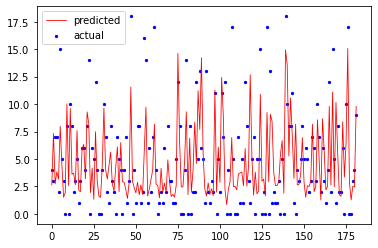

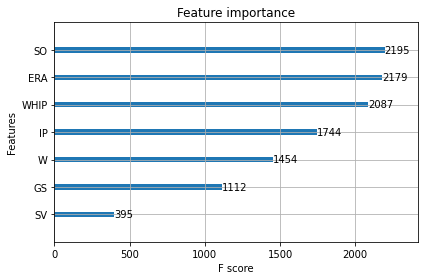

XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 6 candidates, totalling 30 fits
-2.2592735828607777 {'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-2.254427468147152 {'learning_rate': 0.005, 'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.005, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-2.254427468147152 {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500}
Final training score:  0.5012069663451563
Mean cross-validation score: 2.26
K-fold CV average score: 2.26
MAE: 2.65
MSE: 12.85
RMSE: 3.58


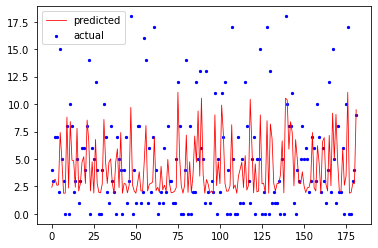

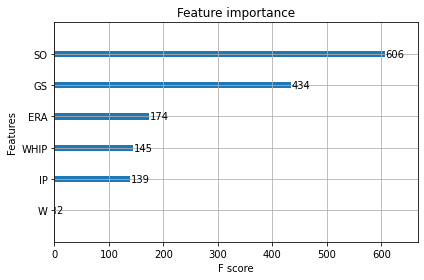

ysv :
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, verbosity=0)
Base training score:  0.9086166973133641
Mean cross-validation score: 2.82
K-fold CV average score: 2.78
Base MAE: 2.40
Base MSE: 27.41
Base RMSE: 5.24


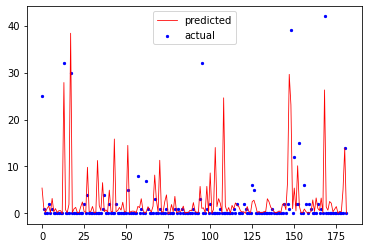

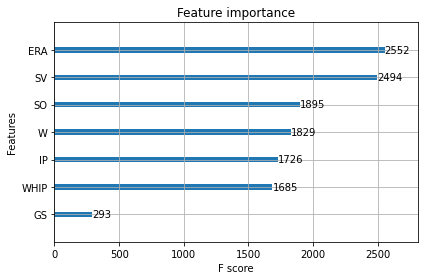

XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 6 candidates, totalling 30 fits
-2.614928884085868 {'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-2.5668779369846626 {'learning_rate': 0.005, 'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.005, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-2.5339321343393104 {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 300}
Final training score:  0.5227594525611301
Mean cross-validation score: 2.56
K-fold CV average score: 2.56
MAE: 2.24
MSE: 21.62
RMSE: 4.65


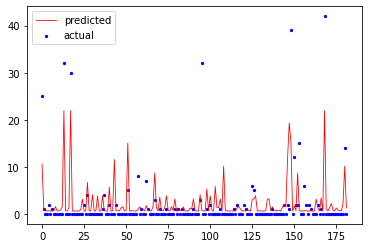

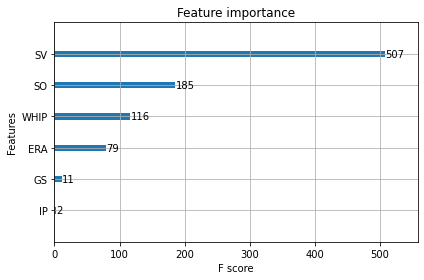

yera :
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, verbosity=0)
Base training score:  0.4818539889460991
Mean cross-validation score: 1.30
K-fold CV average score: 1.26
Base MAE: 1.35
Base MSE: 3.97
Base RMSE: 1.99


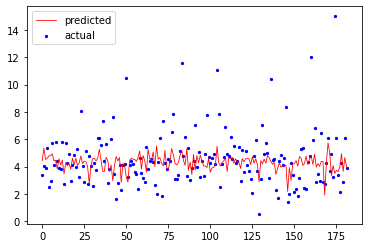

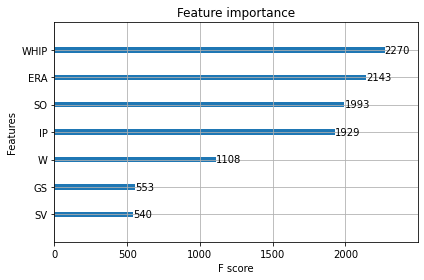

XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 6 candidates, totalling 30 fits
-1.2366119510812383 {'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-1.2175276057467135 {'learning_rate': 0.005, 'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.005, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-1.2175276057467135 {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500}
Final training score:  0.06970082441770697
Mean cross-validation score: 1.23
K-fold CV average score: 1.22
MAE: 1.31
MSE: 3.94
RMSE: 1.98


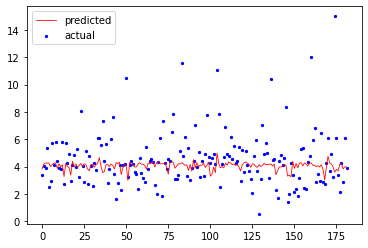

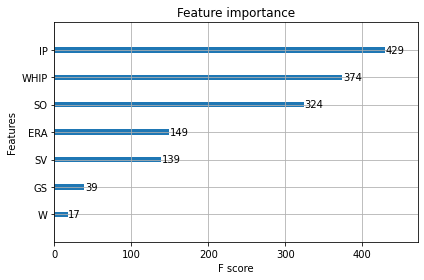

yso :
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, verbosity=0)
Base training score:  0.8255196586536078
Mean cross-validation score: 29.68
K-fold CV average score: 29.86
Base MAE: 30.52
Base MSE: 1633.62
Base RMSE: 40.42


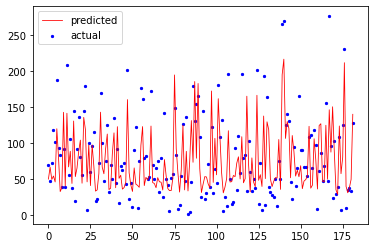

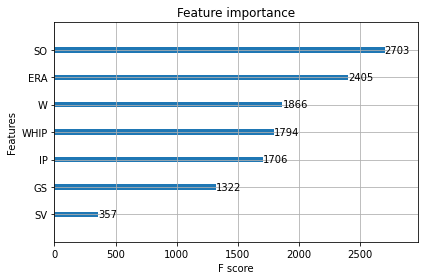

XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 6 candidates, totalling 30 fits
-28.7267370278958 {'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-28.7267370278958 {'learning_rate': 0.01, 'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-28.669949535285184 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}
Final training score:  0.5634390283923951
Mean cross-validation score: 28.81
K-fold CV average score: 28.83
MAE: 30.93
MSE: 1711.58
RMSE: 41.37


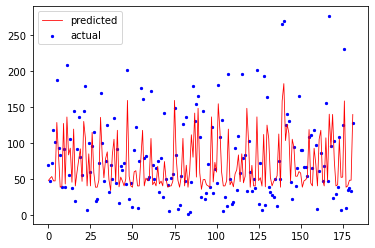

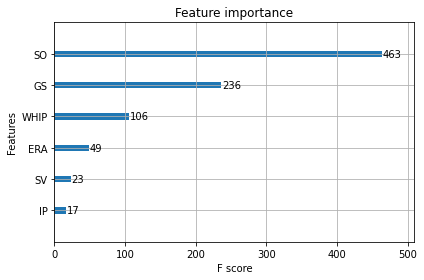

ygs :
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, verbosity=0)
Base training score:  0.9111190249684692
Mean cross-validation score: 4.46
K-fold CV average score: 4.28
Base MAE: 4.20
Base MSE: 46.10
Base RMSE: 6.79


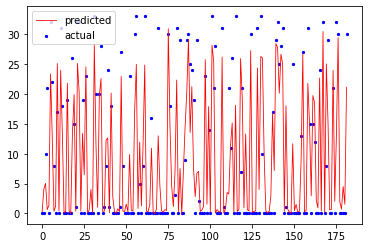

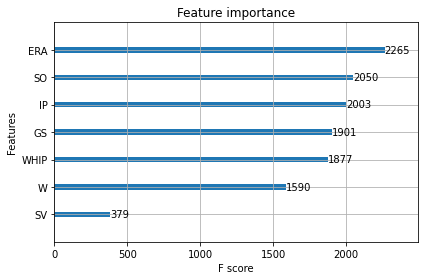

XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 6 candidates, totalling 30 fits
-4.245211091372388 {'max_depth': 3}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, n_estimators=500,
             objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-4.245211091372388 {'learning_rate': 0.01, 'max_depth': 3}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, n_estimators=500,
             objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-4.210401825005286 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
Final training score:  0.7880776446035054
Mean cross-validation score: 4.23
K-fold CV average score: 4.20
MAE: 4.14
MSE: 45.70
RMSE: 6.76


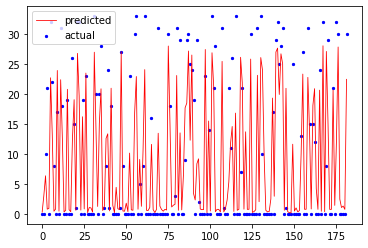

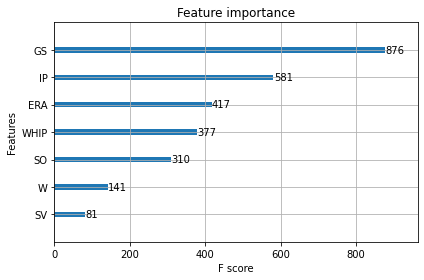

yip :
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, verbosity=0)
Base training score:  0.8474972177651601
Mean cross-validation score: 27.45
K-fold CV average score: 27.30
Base MAE: 27.18
Base MSE: 1354.96
Base RMSE: 36.81


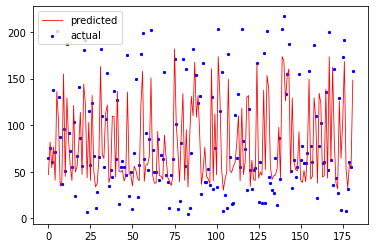

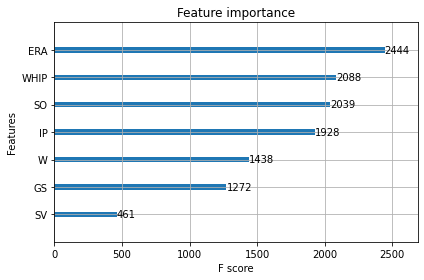

XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 6 candidates, totalling 30 fits
-26.67084570948223 {'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-26.67084570948223 {'learning_rate': 0.01, 'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-26.66198564796406 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 400}
Final training score:  0.6344686884745928
Mean cross-validation score: 26.48
K-fold CV average score: 26.79
MAE: 28.53
MSE: 1472.88
RMSE: 38.38


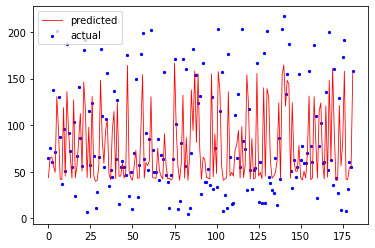

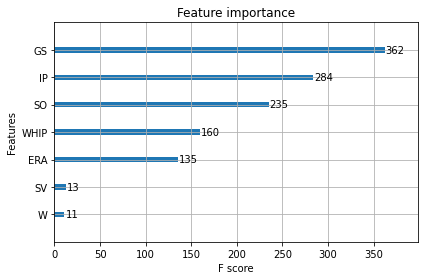

ywhip :
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, verbosity=0)
Base training score:  0.5392283348171176
Mean cross-validation score: 0.22
K-fold CV average score: 0.22
Base MAE: 0.21
Base MSE: 0.09
Base RMSE: 0.30


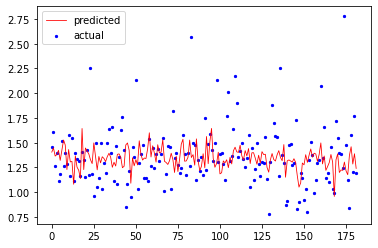

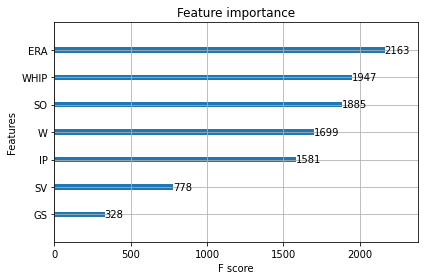

XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=5,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 6 candidates, totalling 30 fits
-0.2154653858155539 {'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.01, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-0.2137328430264525 {'learning_rate': 0.005, 'max_depth': 2}
XGBRegressor(eval_metric='rmse', learning_rate=0.005, max_depth=2,
             n_estimators=500, objective='reg:squarederror')
Fitting 5 folds for each of 5 candidates, totalling 25 fits
-0.2137328430264525 {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500}
Final training score:  0.07153764291369624
Mean cross-validation score: 0.21
K-fold CV average score: 0.21
MAE: 0.21
MSE: 0.10
RMSE: 0.31


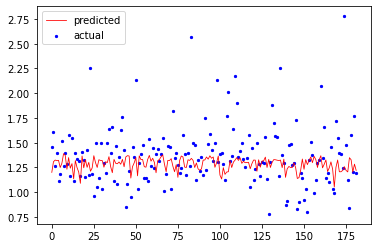

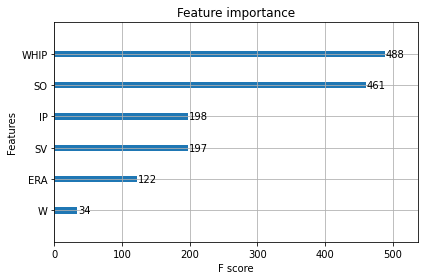

In [ ]:
best_params_list = []

for i in range(len(ys)):
    print(names[i],':')
    y = ys[i]
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=random_state)
    # train_x = xtrain.values, test_y = test_df.values
    tuning(xtrain, xtest, ytrain, ytest, names[i])

In [ ]:
print(best_params_list)

[{'n_estimators': 500, 'learning_rate': 0.005, 'max_depth': 2}, {'n_estimators': 300, 'learning_rate': 0.005, 'max_depth': 2}, {'n_estimators': 500, 'learning_rate': 0.005, 'max_depth': 2}, {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 2}, {'n_estimators': 400, 'learning_rate': 0.01, 'max_depth': 3}, {'n_estimators': 400, 'learning_rate': 0.01, 'max_depth': 2}, {'n_estimators': 500, 'learning_rate': 0.005, 'max_depth': 2}]


In [ ]:
predictions = targets.drop(columns = ['playerID', 'yearID'])
targets.head()

,playerID,yearID,W,GS,SV,SO,IP,WHIP,ERA
4,abadfe01,2019,0,0,0,9,13.000000,0.923077,4.153846
5,abreubr01,2019,0,0,0,13,8.666667,0.807692,1.038462
9,adamja01,2019,3,0,0,18,21.666667,1.153846,2.907692
12,adamsau01,2019,0,0,0,9,14.000000,1.714286,5.142857
13,adamsau02,2019,2,2,0,51,31.000000,1.096774,3.774194


In [ ]:
predictions = predictions[['W', 'SV', 'ERA', 'SO', 'GS', 'IP', 'WHIP']]

In [ ]:
# load all models and predict
w_model = joblib.load('/content/drive/MyDrive/Senior Year/Intro to the Data Science Pipeline /yw.joblib.dat')
targets['W_2020'] = w_model.predict(predictions)

gs_model = joblib.load('/content/drive/MyDrive/Senior Year/Intro to the Data Science Pipeline /ygs.joblib.dat')
targets['GS_2020'] = gs_model.predict(predictions)

sv_model = joblib.load('/content/drive/MyDrive/Senior Year/Intro to the Data Science Pipeline /ysv.joblib.dat')
targets['SV_2020'] = sv_model.predict(predictions)

so_model = joblib.load('/content/drive/MyDrive/Senior Year/Intro to the Data Science Pipeline /yso.joblib.dat')
targets['SO_2020'] = so_model.predict(predictions)

ip_model = joblib.load('/content/drive/MyDrive/Senior Year/Intro to the Data Science Pipeline /yip.joblib.dat')
targets['IP_2020'] = ip_model.predict(predictions)

whip_model = joblib.load('/content/drive/MyDrive/Senior Year/Intro to the Data Science Pipeline /ywhip.joblib.dat')
targets['WHIP_2020'] = whip_model.predict(predictions)

era_model = joblib.load('/content/drive/MyDrive/Senior Year/Intro to the Data Science Pipeline /yera.joblib.dat')
targets['ERA_2020'] = era_model.predict(predictions)

[08:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:12:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
targets.head()

,playerID,yearID,W,GS,SV,SO,IP,WHIP,ERA,W_2020,GS_2020,SV_2020,SO_2020,IP_2020,WHIP_2020,ERA_2020
4,abadfe01,2019,0,0,0,9,13.000000,0.923077,4.153846,1.600403,0.807220,1.119096,36.478519,33.602596,1.269120,4.194324
5,abreubr01,2019,0,0,0,13,8.666667,0.807692,1.038462,1.733456,0.693971,1.176657,37.973530,36.002277,1.229361,4.250476
9,adamja01,2019,3,0,0,18,21.666667,1.153846,2.907692,1.958143,0.868400,0.670003,36.864849,37.475365,1.375409,4.390151
12,adamsau01,2019,0,0,0,9,14.000000,1.714286,5.142857,1.459353,1.677982,0.670003,31.864031,31.855553,1.399912,4.607508
13,adamsau02,2019,2,2,0,51,31.000000,1.096774,3.774194,3.358564,6.668891,0.326415,63.923473,64.976456,1.305535,4.157809


In [ ]:
targets.to_csv('2020_predictions.csv')

In [ ]:
models = [w_model, gs_model, sv_model, so_model, ip_model, whip_model, era_model]
names = ['W', 'GS', 'SV', 'SO', 'IP', 'WHIP', 'ERA']

In [ ]:
"Displays SHAP summary plots"
def shapsum(X, i, model, names):
    explainer = shap.TreeExplainer(model[i])
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, show=False)
    plt.title('Impact of Features on Model Output: '+names[i])
    plt.tight_layout()
    plt.show()

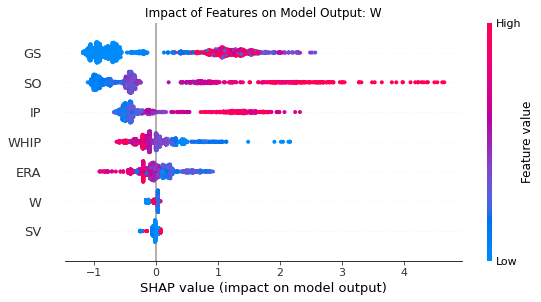

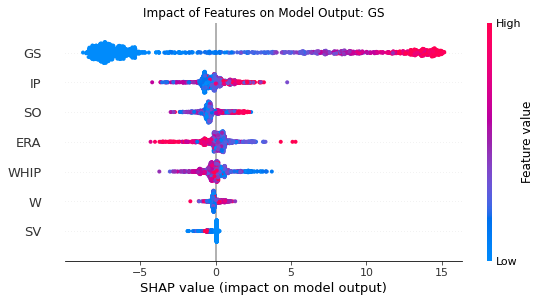

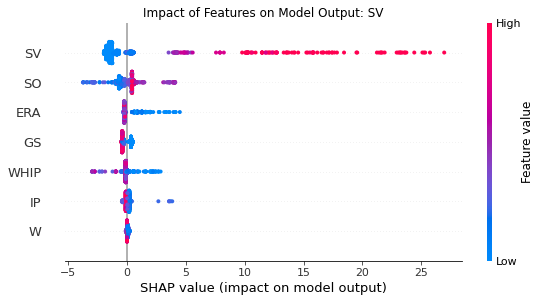

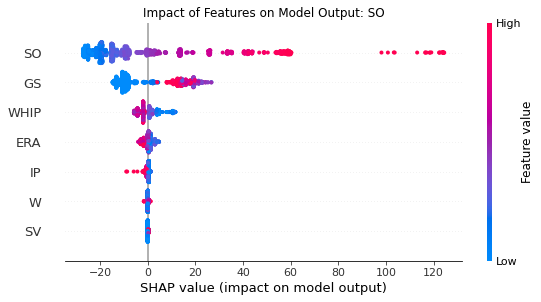

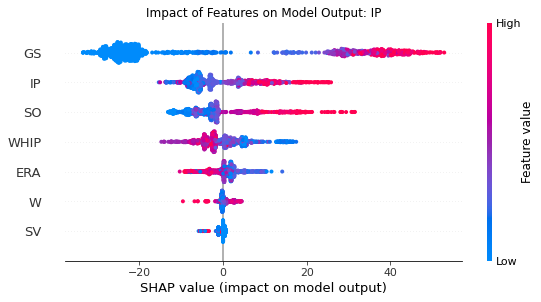

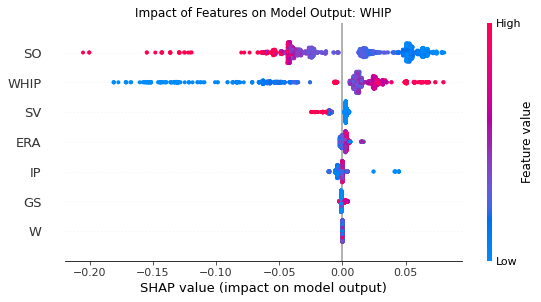

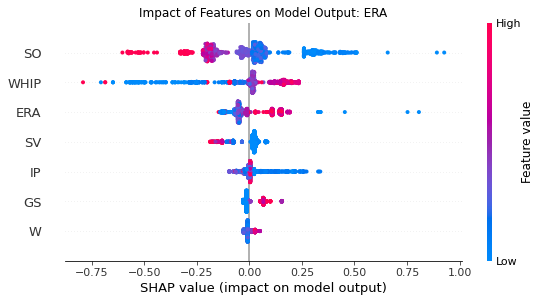

In [ ]:
# Display and save SHAP summary plots for all starting pitcher statistic regression models
for i in range(len(models)):
    shapsum(X, i, models, names)

In [ ]:
max_scherzer = {'W':        [15],
'SV':       [0.000000],
'ERA':     [2.46],
'SO':       [236],
'GS':       [30],
'IP':      [179.33],
'WHIP':     [0.86]}

max_scherzer = pd.DataFrame(data = max_scherzer)

In [ ]:
w_model.predict(max_scherzer)[0]

14.050856

In [ ]:
so_model.predict(max_scherzer)[0]

215.85545

In [ ]:
era_model.predict(max_scherzer)[0]

2.9408784

In [ ]:
#Further Insights
# This section is a short investigation into the predictive value that the basic statistics have on future performance. Predicting next season statistics
# is an extremely valuable skill since players are paid millions of dollars to achieve and maintain a certain level of performance and so could be utilized in a
# professional manner. We utilize three year data from 2016-2018 to train our model that predicts on the following year given a player's single season statistics
# This gave us results that we did expect since statistics seem to have high predictive value for themselves or correlated statistics, like strikeouts for WHIP, or
# games started for innings pitched, since starting pitchers pitch more innings on average. This model however does not do too well with outlying datapoints,
# since an injured player would have skewed data, and predictions on the highest performing pitchers tend to underpredict their next season statistics.
# This model also does not take progression into account since it only looks at single season data, and does not differentiate between a player who has been
# improving year by year, and a pitcher who has been regressing. Since it only does single year lookahead, these trends are lost in the predictions.
# But the main takeaway is that this prediction task is possible, and can be used to make predictions on a player's potential value and can be combined with our
# all-star models to make predictions on next year all-stars.